In [1]:
using GraphMakie
using CSV
using DataFrames
using DelimitedFiles
using ColorSchemes
using Plots
using PlotThemes
using SankeyPlots
using Tables
using StatsPlots
using StatsBase
using LinearAlgebra
using DataFrames

theme(:ggplot2, palette=:Pastel2_8)

In [2]:
unwrapped_complex_names = vec(readdlm("data/complex_names.txt", '\t', String, '\n'))
unwrapped_monomer_names = vec(readdlm("data/protein_names.txt", '\t', String, '\n'))
unwrapped_cofactor_names = vec(readdlm("data/cofactor_names.txt", '\t', String, '\n'))
unwrapped_element_names = vec(readdlm("data/element_ids.txt", '\t', String, '\n'))
unwrapped_pathway_names = vec(readdlm("data/pathway_names.txt", '\t', String, '\n'))
unwrapped_complex_names = vec(readdlm("data/complex_names.txt", '\t', String, '\n'))
unwrapped_monomer_names = vec(readdlm("data/protein_names.txt", '\t', String, '\n'))
unwrapped_cofactor_names = vec(readdlm("data/cofactor_names.txt", '\t', String, '\n'))
unwrapped_element_names = vec(readdlm("data/element_ids.txt", '\t', String, '\n'))
unwrapped_pathway_names = vec(readdlm("data/pathway_names.txt", '\t', String, '\n'))

complex_ids = vec(readdlm("data/complex_ids.txt", '\t', String, '\n'))
monomer_ids = vec(readdlm("data/protein_ids.txt", '\t', String, '\n'))
cofactor_ids = vec(readdlm("data/cofactor_ids.txt", '\t', String, '\n'))
element_ids = vec(readdlm("data/element_ids.txt", '\t', String, '\n'))
pathway_ids = vec(readdlm("data/pathway_ids.txt", '\t', String, '\n'))
aa_ids = vec(readdlm("data/amino_acid_ids.txt", '\t', String, '\n'))


unwrapped_protein_names = [unwrapped_complex_names; unwrapped_monomer_names]
protein_ids = [complex_ids; monomer_ids]

C = Matrix(DataFrame(CSV.File("data/C_matrix.csv", header=false)))
P = Matrix(DataFrame(CSV.File("data/P_matrix.csv", header=false)))
E = Matrix(DataFrame(CSV.File("data/E_matrix.csv", header=false)))
W = Matrix(DataFrame(CSV.File("data/W_matrix.csv", header=false)))
W2 = Matrix(DataFrame(CSV.File("data/W2_matrix.csv", header=false)))
W1 = Matrix(DataFrame(CSV.File("data/W1_matrix.csv", header=false)))

A = Matrix(DataFrame(CSV.File("data/A_matrix.csv", header=false)))

Tree = Matrix(DataFrame(CSV.File("data/tree_matrix.csv")))

li_counts = Matrix(DataFrame(CSV.File("data/li_counts.csv", header=false)))
li_counts_min = Matrix(DataFrame(CSV.File("data/li_counts_min.csv", header=false)))

total_counts_min = Matrix(DataFrame(CSV.File("data/counts.csv", header=false)))
total_counts = Matrix(DataFrame(CSV.File("data/rich_counts.csv", header=false)))
total_counts_anaero = Matrix(DataFrame(CSV.File("data/anaerobic_counts.csv", header=false)))
# total_counts = Matrix(DataFrame(CSV.File("data/counts.csv", header=false)))
total_counts_big = Matrix(DataFrame(CSV.File("data/rich_counts_big.csv", header=false)))
total_counts_big = total_counts_big[:, 2:size(total_counts_big)[2] - 1]

monomer_masses = vec(Matrix(DataFrame(CSV.File("data/monomer_masses.csv", header=false))))
monomer_areas = vec(Matrix(DataFrame(CSV.File("data/monomer_areas.csv", header=false))))
complex_areas = vec(Matrix(DataFrame(CSV.File("data/complex_areas.csv", header=false))))
protein_areas = [complex_areas; monomer_areas]
complex_ids = vec(readdlm("data/complex_ids.txt", '\t', String, '\n'))
monomer_ids = vec(readdlm("data/protein_ids.txt", '\t', String, '\n'))
cofactor_ids = vec(readdlm("data/cofactor_ids.txt", '\t', String, '\n'))
element_ids = vec(readdlm("data/element_ids.txt", '\t', String, '\n'))
pathway_ids = vec(readdlm("data/pathway_ids.txt", '\t', String, '\n'))
aa_ids = vec(readdlm("data/amino_acid_ids.txt", '\t', String, '\n'))


unwrapped_protein_names = [unwrapped_complex_names; unwrapped_monomer_names]
protein_ids = [complex_ids; monomer_ids]

C = Matrix(DataFrame(CSV.File("data/C_matrix.csv", header=false)))
P = Matrix(DataFrame(CSV.File("data/P_matrix.csv", header=false)))
E = Matrix(DataFrame(CSV.File("data/E_matrix.csv", header=false)))
W = Matrix(DataFrame(CSV.File("data/W_matrix.csv", header=false)))
W2 = Matrix(DataFrame(CSV.File("data/W2_matrix.csv", header=false)))
W1 = Matrix(DataFrame(CSV.File("data/W1_matrix.csv", header=false)))

A = Matrix(DataFrame(CSV.File("data/A_matrix.csv", header=false)))

Tree = Matrix(DataFrame(CSV.File("data/tree_matrix.csv")))

total_counts_min = Matrix(DataFrame(CSV.File("data/counts.csv", header=false)))
total_counts = Matrix(DataFrame(CSV.File("data/rich_counts.csv", header=false)))
total_counts_anaero = Matrix(DataFrame(CSV.File("data/anaerobic_counts.csv", header=false)))
# total_counts = Matrix(DataFrame(CSV.File("data/counts.csv", header=false)))
total_counts_big = Matrix(DataFrame(CSV.File("data/rich_counts_big.csv", header=false)))
total_counts_big = total_counts_big[:, 2:size(total_counts_big)[2] - 1]

monomer_masses = vec(Matrix(DataFrame(CSV.File("data/monomer_masses.csv", header=false))))
monomer_areas = vec(Matrix(DataFrame(CSV.File("data/monomer_areas.csv", header=false))))
complex_areas = vec(Matrix(DataFrame(CSV.File("data/complex_areas.csv", header=false))))
protein_areas = [complex_areas; monomer_areas]


tim_export = total_counts * C * P * E
CSV.write("data/element_sim.csv",  Tables.table(tim_export), writeheader=true, header=unwrapped_element_names)

# dismutase_idx = findfirst(isequal("SUPEROX-DISMUTFE-CPLX"), protein_ids)
# total_counts[:, dismutase_idx] .= 15000

# nadh_dehyd_idx = findfirst(isequal("NADH-DHI-CPLX"), protein_ids) 
# total_counts[:, nadh_dehyd_idx, :] .= 400

# succ_quinone_idx = findfirst(isequal("CPLX0-8160"), protein_ids) 
# total_counts[:, succ_quinone_idx, :] .= 1000

# temp_remove = ["EG11415-MONOMER", "EG12132-MONOMER", "CPLX0-7908", 
#     "EG12332-MONOMER", "CPLX0-7617", "EG11378-MONOMER", "CPLX0-7824",
#     "G7748-MONOMER", "CPLX0-7682"]

# for item in temp_remove
#     cur_idx = findfirst(isequal(item), protein_ids)
#     total_counts[:, cur_idx] .= 0
# end

dps_idx = findfirst(isequal("EG11415-MONOMER"), monomer_ids) 
P[dps_idx, :] .= 0

counts_min = vec(total_counts_min[1100, :])
counts = vec(total_counts[600, :])
counts_anaero = vec(total_counts_anaero[2500, :])

total_counts_forecast = deepcopy(total_counts_anaero)

narg_idx = findfirst(isequal("NITRATREDUCTA-CPLX"), protein_ids) #x1000
total_counts_forecast[:, narg_idx] .= 10000 

form_idx = findfirst(isequal("FORMATEDEHYDROGN-CPLX"), protein_ids) # x300
total_counts_forecast[:, form_idx] .= 1000

hyc_idx = findfirst(isequal("FHLMULTI-CPLX"), protein_ids) #x50
total_counts_forecast[:, hyc_idx] .= 1000

total_counts_forecast_sox = deepcopy(total_counts)
sox_idx = findfirst(isequal("SUPEROX-DISMUTMN-CPLX"), protein_ids) #x10
total_counts_forecast_sox[:, sox_idx] .*= 10

# correction


1301-element view(::Matrix{Int64}, :, 1049) with eltype Int64:
 179660
 179660
 179720
 179790
 179830
 179880
 179940
 180030
 180060
 180100
 180150
 180220
 180290
      ⋮
 316010
 316160
 316270
 316380
 316500
 316680
 316780
 316890
 317020
 317110
 317220
 317360

In [3]:
function wrap_text(text::String, char_limit::Int)
    # Split the text into words
    words = split(text)
    wrapped_text = ""
    line_length = 0

    for word in words
        if line_length + length(word) > char_limit
            wrapped_text *= "\n"
            line_length = 0
        elseif wrapped_text != ""
            wrapped_text *= " "
        end
        wrapped_text *= word
        line_length += length(word) + 1  # +1 for the space
    end

    return wrapped_text
end

# Example usage:
char_limit = 30  # Insert a newline after 10 characters

# Wrap each category label
complex_names = [wrap_text(item, char_limit) for item in unwrapped_complex_names]
monomer_names = [wrap_text(item, char_limit) for item in unwrapped_monomer_names]
cofactor_names = [wrap_text(item, char_limit) for item in unwrapped_cofactor_names]
element_names = [wrap_text(item, char_limit) for item in unwrapped_element_names]
pathway_names = [wrap_text(item, char_limit) for item in unwrapped_pathway_names]
protein_names = [wrap_text(item, char_limit) for item in unwrapped_protein_names]

5527-element Vector{String}:
 "1-phosphofructokinase"
 "2-oxoglutarate dehydrogenase\ncomplex"
 "3-isopropylmalate\ndehydrogenase"
 "3-isopropylmalate dehydratase"
 "3-methyl-2-oxobutanoate\nhydroxymethyltransferase"
 "3-oxoacyl-[acyl carrier\nprotein] synthase 2"
 "6-phosphofructokinase 1"
 "6-phosphofructokinase 2"
 "6-phosphogluconate\ndehydrogenase, decarboxylating"
 "7-&alpha;-hydroxysteroid\ndehydrogenase"
 "8-amino-7-oxononanoate\nsynthase"
 "ferric enterobactin ABC\ntransporter"
 "iron(III) hydroxamate ABC\ntransporter"
 ⋮
 "putative ABC transporter\nmembrane subunit YphD"
 "putative ABC transporter\nATP-binding protein YphE"
 "DnaA initiator-associating\nprotein DiaA"
 "intermembrane phospholipid\ntransport system, integral\nmembrane subunit MlaE"
 "intermembrane phospholipid\ntransport system, ATP binding\nsubunit MlaF"
 "putative transport protein\nYrbG"
 "galactofuranose ABC\ntransporter periplasmic\nbinding protein"
 "galactofuranose ABC\ntransporter putative ATP\nbinding 

# Create Sankey diagram of where the iron flows in the cell.

# Redoing the plotting prep 

In [22]:
cur_elements = ["ZN"]
cap_entries = 8

# create counts matrices
C_P_counts = C .* repeat(counts_min, 1, length(monomer_names))
C_E_counts = C_P_counts * P * E


# we have to normalize the array because C is not norm-preserving. 
C_W = C * W * W2
C_W_norm = Array{Float64}(copy(C_W))

for i in 1:size(C_W_norm)[1]
    C_W_norm[i, :] = C_W[i, :] / (sum(C_W[i, :]) + 0.00001)
end

C_W_norm_counts_cats = C_W_norm

# creating element indices of interest
element_idxs = [element in cur_elements for element in element_names]
element_idxs_nz = findall(vec(element_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]


# corrective factor multiplies a cplx by its cofactor stoichiometry
corrective_factor = sum((C * P * E)[capped_complex_idx, element_idxs], dims=2)

# create "remaining elements"
total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))
in_use_element_counts = vec(sum(capped_C_E, dims=1))
remaining_element_counts = vec(total_element_counts - in_use_element_counts)

# create "no class cplx", just use C_E counts
unclassified_cplx_idxs = vec(sum(capped_C_W, dims=2) .== 0)
unclassified_cplx_counts = vec(sum(capped_C_E, dims=2))

# create sizes
n_cplx = length(capped_complex_idx)
n_classes = length(capped_classes)
n_elements = length(cur_elements)

# initialize arrays
src = Vector{Int64}()
dst = Vector{Int64}()
weights = Vector{Int64}()

test_class_count = Vector{Int64}()

# create labels
node_labels = [element_names[element_idxs]; 
                protein_names[capped_complex_idx]; 
                pathway_names[capped_classes];
                ["Remaining $c proteins" for c ∈ element_names[element_idxs]];
               # "Uncategorized"
]

# create colors
colors = ones(Int64, length(node_labels))

element_colors = collect(1:(n_elements))
other_color = 0

colors[1:n_elements] = element_colors

# create sorting
## sorts elements
ordering_elements = Vector{Pair{Int64, Int64}}()
sort_elements = sortperm(vec(sum(capped_C_E, dims=1)), rev=true)
for i in 1:(n_elements-1)
    push!(ordering_elements, sort_elements[i]=>sort_elements[i+1])
end

## sorts elements
ordering_cplexes = Vector{Pair{Int64, Int64}}()
sort_cplx = sortperm(vec(sum(capped_C_E, dims=2)), rev=false)
for i in 1:(n_cplx-1)
    push!(ordering_cplexes, sort_cplx[i]=>sort_cplx[i+1])
end

# sort_cplxs = sortperm(vec(sum(capped_C_E, dims=2)), rev=true)
# for i in 1:(n_cplx-1)
#     push!(ordering_elements, n_elements+sort_cplxs[i]=>n_elements+sort_cplxs[i+1]) 
# end

# order of index assignments
# elements, cplx, classes, remaining elements, no class label

# chart progress: E -> C -> W
# E -> C, reverse order because im a dumbass
for i in 1:n_elements
    for j in 1:n_cplx
        if capped_C_E[j, i] != 0
            
            push!(src, i)
            push!(dst, n_elements + j)
            push!(weights, capped_C_E[j, i])
            
            colors[n_elements + j] = colors[i]
            
        end  
    end
end

# # C -> W
for i in 1:n_cplx
    for j in 1:n_classes
        if capped_C_W[i, j] != 0
            
            # corrective factor multiplies by element multiplicity to maintain flow size
            
            push!(src, n_elements + i)
            push!(dst, n_elements + n_cplx + j)
            push!(weights, trunc(Int64, capped_C_W[i, j] * capped_C_E[i]))   
            
            colors[n_elements + n_cplx + j] = colors[n_elements + i]

            push!(test_class_count, trunc(Int64, capped_C_W[i, j] * capped_C_E[i]))
            
        end  
    end
    
    if unclassified_cplx_idxs[i]
        push!(src, n_elements + i)
        push!(dst, n_elements + n_cplx + n_classes + n_elements + 1)
        push!(weights, unclassified_cplx_counts[i])
        
        colors[n_elements + n_cplx + n_classes + n_elements + 1] = colors[n_elements + i]
    end
    
end

# E -> C remaining cnts
for i in 1:n_elements
    push!(src, i)
    push!(dst, n_elements + n_cplx + n_classes + i)
    push!(weights, remaining_element_counts[i])
    colors[n_elements + n_cplx + n_classes + i] = colors[i]
end 

# # C -> P remaining cnts in displayed classes
# for i in 1:n_elements



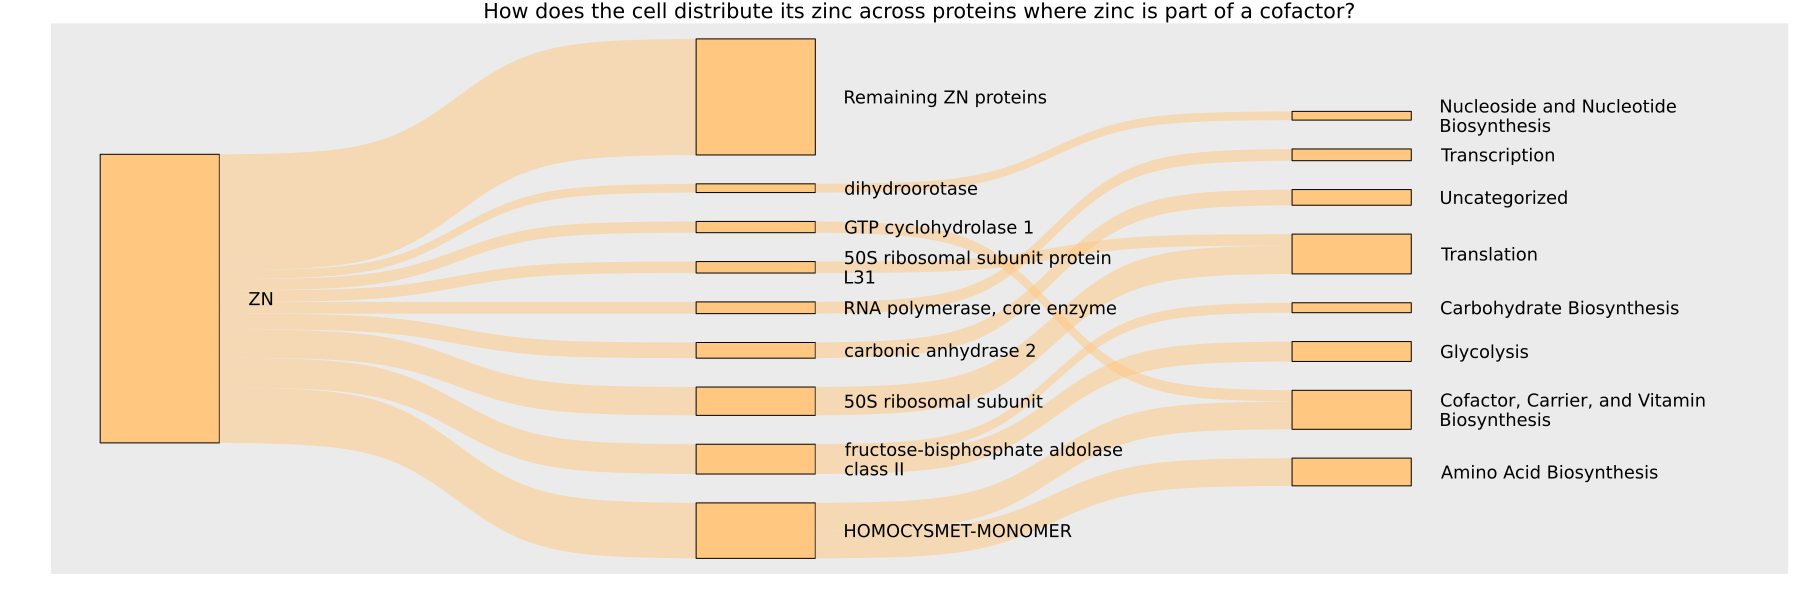

In [23]:
sankey(src, dst, weights, 
        compact = true,
        node_labels = node_labels,
        node_colors = cgrad(:copper, maximum(colors)+1, categorical = true, rev=true)[colors],
        edge_color = :src,
        size=(1800, 600),
        label_position = :right,
        label_size = 12,
        force_order = ordering_cplexes,
        title="How does the cell distribute its zinc across proteins where zinc is part of a cofactor?"
)

# savefig("figures/zinc.svg")

## Reverse sankey 

In [79]:
cur_elements = ["ZN"]
cap_entries = 10

# create counts matrices
C_P_counts = C .* repeat(counts_min, 1, length(monomer_names))
C_E_counts = C_P_counts * P * E


# we have to normalize the array because C is not norm-preserving. 
C_W = C * W * W2
C_W_norm = Array{Float64}(copy(C_W))

for i in 1:size(C_W_norm)[1]
    C_W_norm[i, :] = C_W[i, :] / (sum(C_W[i, :]) + 0.00001)
end

C_W_norm_counts_cats = C_W_norm

# creating element indices of interest
element_idxs = [element in cur_elements for element in element_names]
element_idxs_nz = findall(vec(element_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]


# corrective factor multiplies a cplx by its cofactor stoichiometry
corrective_factor = sum((C * P * E)[capped_complex_idx, element_idxs], dims=2)

# create "remaining elements"
total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))
in_use_element_counts = vec(sum(capped_C_E, dims=1))
remaining_element_counts = vec(total_element_counts - in_use_element_counts)

# create "no class cplx", just use C_E counts
unclassified_cplx_idxs = vec(sum(capped_C_W, dims=2) .== 0)
unclassified_cplx_counts = vec(sum(capped_C_E, dims=2))

# create sizes
n_cplx = length(capped_complex_idx)
n_classes = length(capped_classes)
n_elements = length(cur_elements)

# initialize arrays
src = Vector{Int64}()
dst = Vector{Int64}()
weights = Vector{Int64}()

test_class_count = Vector{Int64}()

# class counts
class_counts = zeros(Int64, n_classes)

# create labels
node_labels = [element_names[element_idxs]; 
                protein_names[capped_complex_idx]; 
                pathway_names[capped_classes];
                ["Remaining $c proteins" for c ∈ element_names[element_idxs]];
               # "Uncategorized"
]

# create colors
colors = ones(Int64, length(node_labels))

element_colors = collect(1:(n_elements))
other_color = 0

colors[1:n_elements] = element_colors

# create sorting
## sorts elements
ordering_elements = Vector{Pair{Int64, Int64}}()
sort_elements = sortperm(vec(sum(capped_C_E, dims=1)), rev=true)
for i in 1:(n_elements-1)
    push!(ordering_elements, sort_elements[i]=>sort_elements[i+1])
end

## sorts elements
ordering_cplexes = Vector{Pair{Int64, Int64}}()
sort_cplx = sortperm(vec(sum(capped_C_E, dims=2)), rev=true)
for i in 1:(n_cplx-1)
    push!(ordering_cplexes, n_elements+sort_cplx[i]=>n_elements+sort_cplx[i+1])
end


# sort_cplxs = sortperm(vec(sum(capped_C_E, dims=2)), rev=true)
# for i in 1:(n_cplx-1)
#     push!(ordering_elements, n_elements+sort_cplxs[i]=>n_elements+sort_cplxs[i+1]) 
# end

# order of index assignments
# elements, cplx, classes, remaining elements, no class label

# chart progress: E -> C -> W

# # C -> W
for i in 1:n_cplx
    for j in 1:n_classes
        if capped_C_W[i, j] != 0
            
            # corrective factor multiplies by element multiplicity to maintain flow size
            
            push!(dst, n_elements + i)
            push!(src, n_elements + n_cplx + j)
            push!(weights, trunc(Int64, capped_C_W[i, j] * capped_C_E[i]))

            class_counts[j] += trunc(Int64, capped_C_W[i, j] * capped_C_E[i])
            
            colors[n_elements + n_cplx + j] = colors[n_elements + i]

            push!(test_class_count, trunc(Int64, capped_C_W[i, j] * capped_C_E[i]))
            
        end  
    end
    
    if unclassified_cplx_idxs[i]
        push!(dst, n_elements + i)
        push!(src, n_elements + n_cplx + n_classes + n_elements + 1)
        push!(weights, unclassified_cplx_counts[i])
        
        colors[n_elements + n_cplx + n_classes + n_elements + 1] = colors[n_elements + i]
    end
    
end

# W -> E, reverse order because im a dumbass
for i in 1:n_elements
    for j in 1:n_classes
        if capped_C_E[j, i] != 0
            
            push!(src, i)
            push!(dst, n_elements + n_cplx + j)
            push!(weights, class_counts[j])
            
            colors[n_elements + n_cplx + j] = colors[i]
            
        end  
    end
end

## sorts classes
sort_class = sortperm(vec(class_counts), rev=true)
for i in 1:(n_classes-1)
    push!(ordering_cplexes, n_elements+n_cplx+sort_class[i]=>n_elements+n_cplx+sort_class[i+1])
end

# remaining counts is last
push!(ordering_cplexes, n_elements+n_cplx+sort_class[end]=>n_elements + n_cplx + n_classes + 1)

# E -> W remaining cnts
for i in 1:n_elements
    push!(src, i)
    push!(dst, n_elements + n_cplx + n_classes + i)
    push!(weights, remaining_element_counts[i])
    colors[n_elements + n_cplx + n_classes + i] = colors[i]
end 

# # C -> P remaining cnts in displayed classes
# for i in 1:n_elements



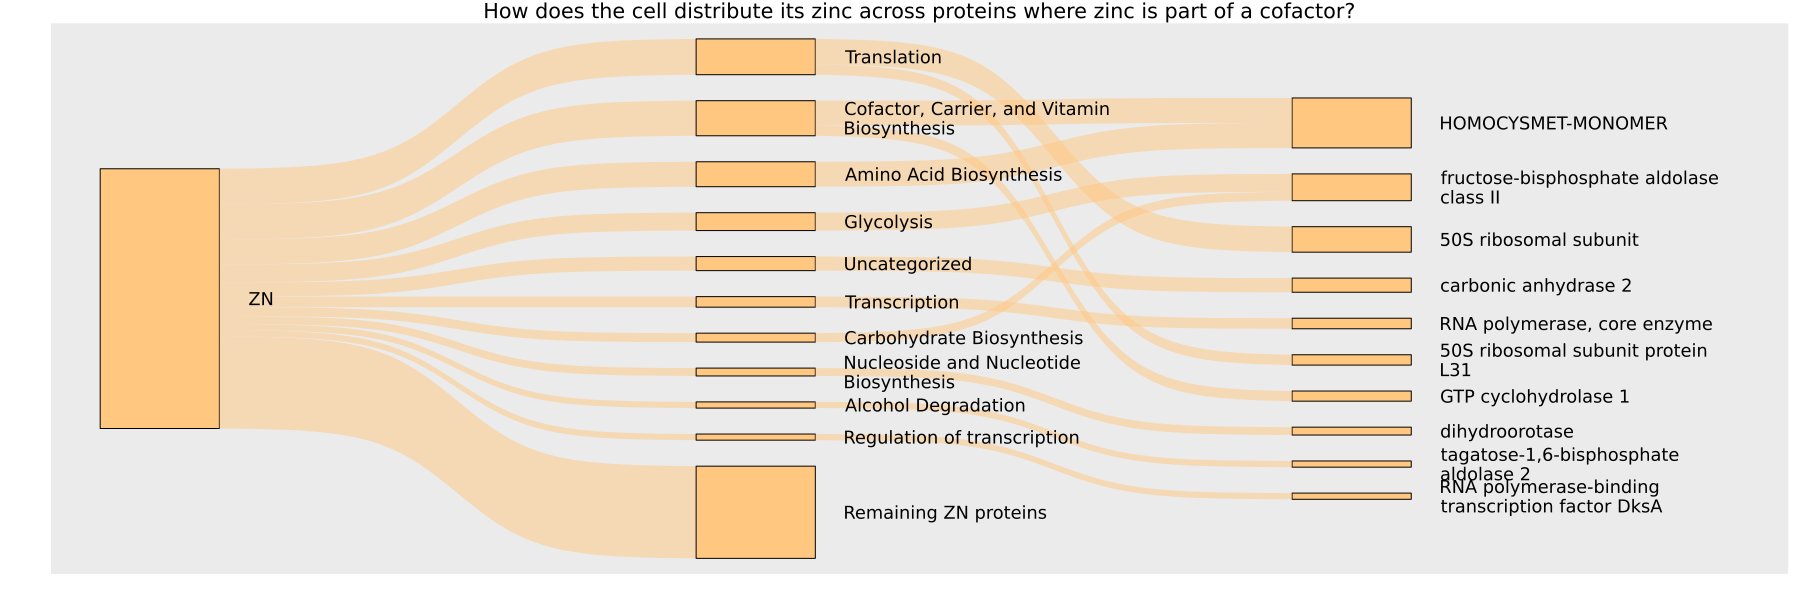

In [82]:
sankey(src, dst, weights, 
        compact = true,
        node_labels = node_labels,
        node_colors = cgrad(:copper, maximum(colors)+1, categorical = true, rev=true)[colors],
        edge_color = :src,
        size=(1800, 600),
        label_position = :right,
        label_size = 12,
        force_order = ordering_cplexes,
        title="How does the cell distribute its zinc across proteins where zinc is part of a cofactor?"
)

# savefig("figures/zinc.svg")

# Histograms


# Specialist vs generalist, CDF 

# Methionine sketch

In [52]:
data = [2000 280000;
        400000 700000;
        180000 16000;
        2000 80000;
        2000 80000]

ctg = repeat(["+met", "-met"], inner = 5)
nam = repeat(["metE counts", "zinc atoms per cell", "rpmE counts", "ykgM counts", "ykgO counts"], outer = 2)

10-element Vector{String}:
 "metE counts"
 "zinc atoms per cell"
 "rpmE counts"
 "ykgM counts"
 "ykgO counts"
 "metE counts"
 "zinc atoms per cell"
 "rpmE counts"
 "ykgM counts"
 "ykgO counts"

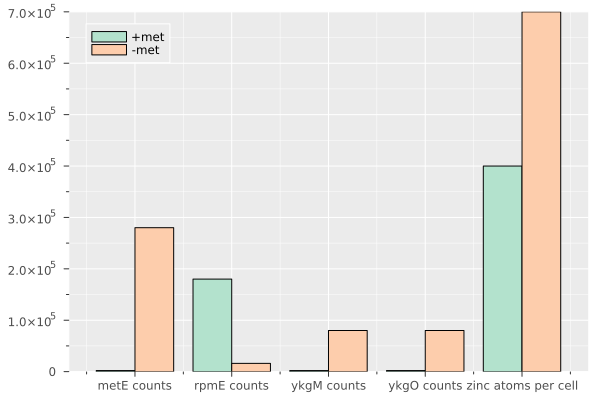

In [53]:
groupedbar(nam, data, group=ctg)

## Premium Amino Acids (tm)

In [56]:
aa_ids

22-element Vector{String}:
 "TYR"
 "VAL"
 "TER"
 "HIS"
 "PRO"
 "TRP"
 "GLN"
 "GLU"
 "PHE"
 "SEL"
 "GLY"
 "THR"
 "ALA"
 "ILE"
 "ASP"
 "ARG"
 "SER"
 "LEU"
 "LYS"
 "ASN"
 "MET"
 "CYS"

In [57]:
cur_elements = ["TRP"]
cap_entries = 50

# create counts matrices
C_P_counts = C .* repeat(counts, 1, length(monomer_names))
C_E_counts = C_P_counts * A #  * E


# we have to normalize the array because C is not norm-preserving. 
C_W = C * W * W2
C_W_norm = Array{Float64}(copy(C_W))

for i in 1:size(C_W_norm)[1]
    C_W_norm[i, :] = C_W[i, :] / (sum(C_W[i, :]) + 0.00001)
end

C_W_norm_counts_cats = C_W_norm

# creating element indices of interest
element_idxs = [element in cur_elements for element in aa_ids]
element_idxs_nz = findall(vec(element_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]


# corrective factor multiplies a cplx by its cofactor stoichiometry
corrective_factor = sum((C * A)[capped_complex_idx, element_idxs], dims=2)

# create "remaining elements"
total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))
in_use_element_counts = vec(sum(capped_C_E, dims=1))
remaining_element_counts = vec(total_element_counts - in_use_element_counts)

# create "no class cplx", just use C_E counts
unclassified_cplx_idxs = vec(sum(capped_C_W, dims=2) .== 0)
unclassified_cplx_counts = vec(sum(capped_C_E, dims=2))

# create sizes
n_cplx = length(capped_complex_idx)
n_classes = length(capped_classes)
n_elements = length(cur_elements)

# initialize arrays
src = Vector{Int64}()
dst = Vector{Int64}()
weights = Vector{Int64}()

# create labels
node_labels = [aa_ids[element_idxs]; 
                unwrapped_protein_names[capped_complex_idx]; 
                unwrapped_pathway_names[capped_classes];
                ["Remaining $c proteins" for c ∈ aa_ids[element_idxs]];
                "Uncategorized"]

# create colors
colors = zeros(Int64, length(node_labels))

element_colors = collect(1:(n_elements))
other_color = 0

colors[1:n_elements] = element_colors

# create sorting
## sorts elements
ordering_elements = Vector{Pair{Int64, Int64}}()
sort_elements = sortperm(vec(sum(capped_C_E, dims=1)), rev=true)
for i in 1:(n_elements-1)
    push!(ordering_elements, sort_elements[i]=>sort_elements[i+1])
end

# sort_cplxs = sortperm(vec(sum(capped_C_E, dims=2)), rev=true)
# for i in 1:(n_cplx-1)
#     push!(ordering_elements, n_elements+sort_cplxs[i]=>n_elements+sort_cplxs[i+1]) 
# end

# order of index assignments
# elements, cplx, classes, remaining elements, no class label

# chart progress: E -> C -> W
# E -> C, reverse order because im a dumbass
for i in 1:n_elements
    for j in 1:n_cplx
        if capped_C_E[j, i] != 0
            
            push!(src, i)
            push!(dst, n_elements + j)
            push!(weights, capped_C_E[j, i])
            
            colors[n_elements + j] = colors[i]
            
        end  
    end
end

# # C -> W
for i in 1:n_cplx
    for j in 1:n_classes
        if capped_C_W[i, j] != 0
            
            # corrective factor multiplies by element multiplicity to maintain flow size
            
            push!(src, n_elements + i)
            push!(dst, n_elements + n_cplx + j)
            push!(weights, trunc(Int64, capped_C_W[i, j] * vec(sum(capped_C_E, dims=2))[i]))   
            
            colors[n_elements + n_cplx + j] = colors[n_elements + i]
            
        end  
    end
    
    if unclassified_cplx_idxs[i]
        push!(src, n_elements + i)
        push!(dst, n_elements + n_cplx + n_classes + n_elements + 1)
        push!(weights, unclassified_cplx_counts[i])
        
        colors[n_elements + n_cplx + n_classes + n_elements + 1] = colors[n_elements + i]
    end
    
end

# E -> C remaining cnts
for i in 1:n_elements
    push!(src, i)
    push!(dst, n_elements + n_cplx + n_classes + i)
    push!(weights, remaining_element_counts[i])
    colors[n_elements + n_cplx + n_classes + i] = colors[i]
end 

# # C -> P remaining cnts in displayed classes
# for i in 1:n_elements



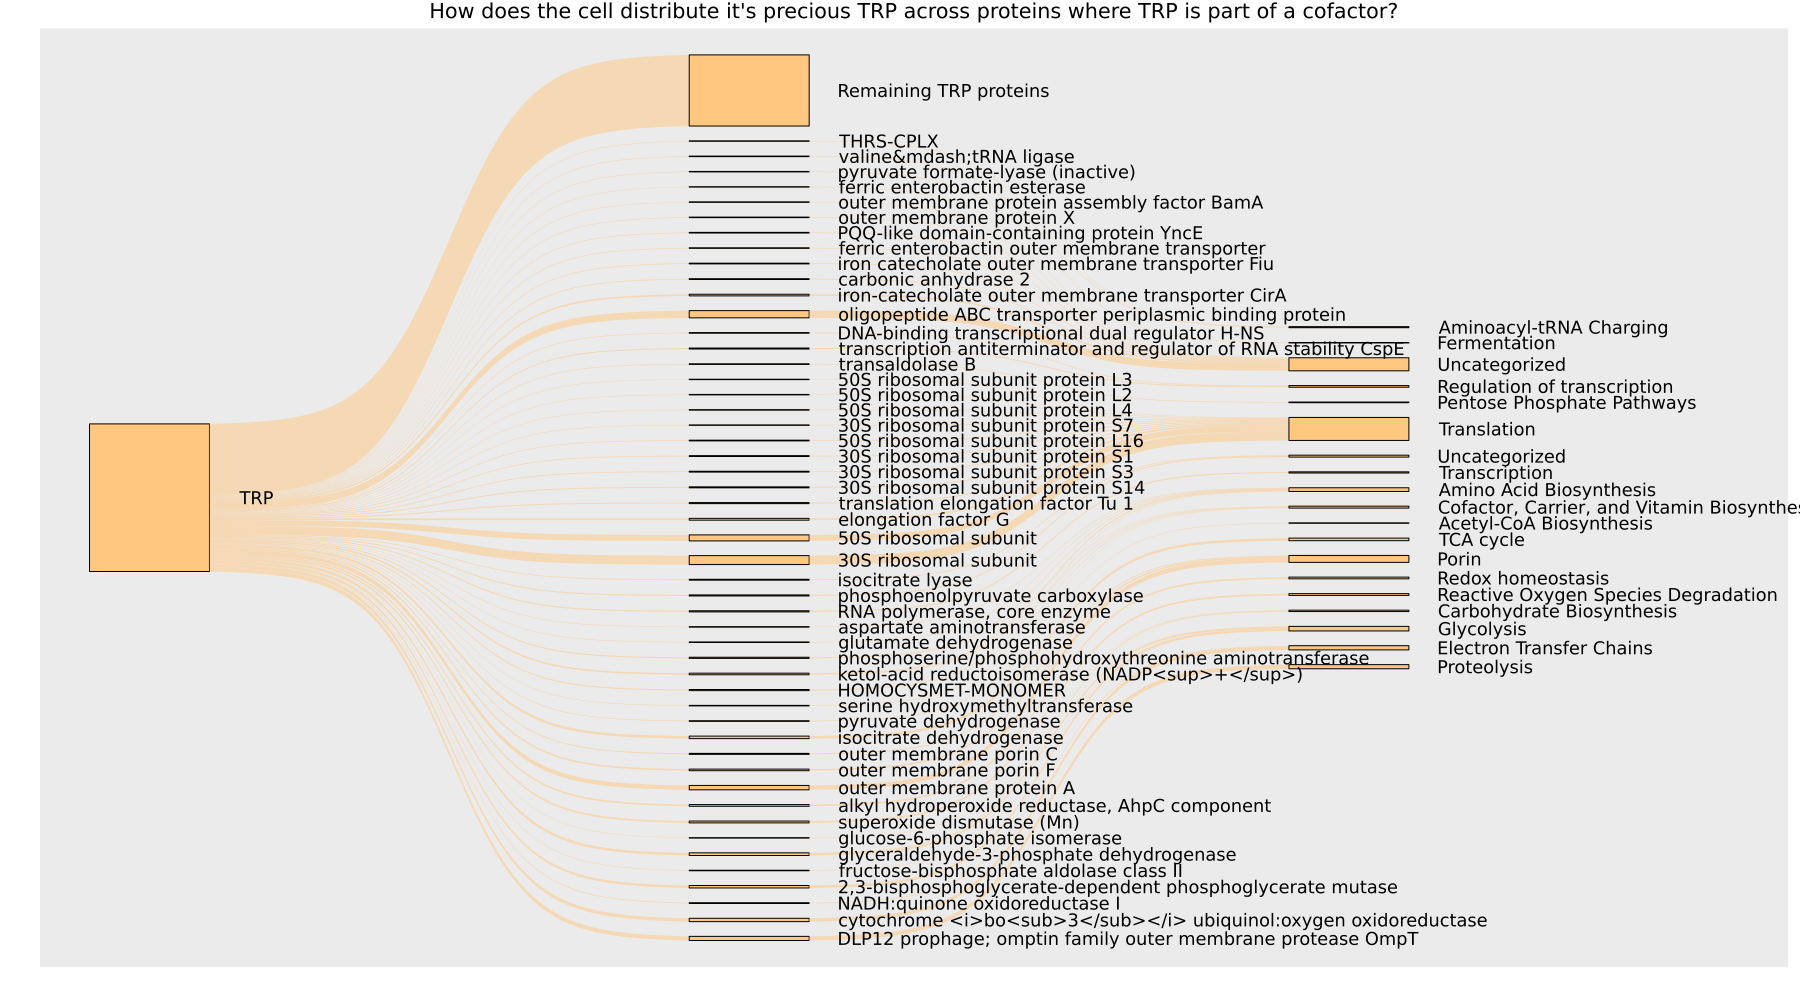

In [58]:
sankey(src, dst, weights, 
        compact = true,
        node_labels = node_labels,
        node_colors = cgrad(:copper, maximum(colors)+1, categorical = true, rev=true)[colors],
        edge_color = :src,
        size=(1800, 1000),
        label_position = :right,
        label_size = 12,
        force_order = ordering_elements,
        title="How does the cell distribute it's precious TRP across proteins where TRP is part of a cofactor?"
)

# savefig("figures/general_ressource_aa.svg")

# Proteome mass fraction cofactor pathways

In [59]:
W_comb = W * W2
W_norm = Array{Float64}(copy(W_comb))

for i in 1:size(W_norm)[1]
    W_norm[i, :] = W_norm[i, :] / (sum(W_norm[i, :]) + 0.00001)
end

In [60]:
top_protein_masses = transpose(Diagonal(monomer_masses)) * transpose(C) * vec(counts_min)
top_protein_masses = Array{Float64}(top_protein_masses)
top_protein_masses = top_protein_masses ./ (10^(10)) 
top_protein_masses = top_protein_masses ./ (6.023 * 10^(13)) 

top_L2_rank = sortperm(top_protein_masses, rev=true)
total_protein_mass = sum(top_protein_masses)

[monomer_names[top_L2_rank] top_protein_masses[top_L2_rank]][1:40, :]

40×2 Matrix{Any}:
 "HOMOCYSMET-MONOMER"                                           6.08977e-15
 "translation elongation factor\nTu 1"                          4.58126e-15
 "outer membrane protein A"                                     4.30041e-15
 "glyceraldehyde-3-phosphate\ndehydrogenase A"                  4.21251e-15
 "outer membrane porin F"                                       4.11633e-15
 "murein lipoprotein"                                           3.4308e-15
 "30S ribosomal subunit protein\nS1"                            3.15456e-15
 "DLP12 prophage; omptin family\nouter membrane protease OmpT"  2.94134e-15
 "isocitrate dehydrogenase"                                     2.72041e-15
 "50S ribosomal subunit protein\nL12"                           2.68308e-15
 "elongation factor G"                                          2.36134e-15
 "ketol-acid reductoisomerase\n(NADP<sup>+</sup>)"              2.29257e-15
 "alkyl hydroperoxide reductase,\nAhpC component"               2.25171

In [61]:
[monomer_names[top_L2_rank] top_protein_masses[top_L2_rank]/total_protein_mass][1:40, :]

40×2 Matrix{Any}:
 "HOMOCYSMET-MONOMER"                                           0.0260675
 "translation elongation factor\nTu 1"                          0.0196103
 "outer membrane protein A"                                     0.0184081
 "glyceraldehyde-3-phosphate\ndehydrogenase A"                  0.0180318
 "outer membrane porin F"                                       0.0176201
 "murein lipoprotein"                                           0.0146857
 "30S ribosomal subunit protein\nS1"                            0.0135032
 "DLP12 prophage; omptin family\nouter membrane protease OmpT"  0.0125905
 "isocitrate dehydrogenase"                                     0.0116448
 "50S ribosomal subunit protein\nL12"                           0.011485
 "elongation factor G"                                          0.0101078
 "ketol-acid reductoisomerase\n(NADP<sup>+</sup>)"              0.00981344
 "alkyl hydroperoxide reductase,\nAhpC component"               0.00963851
 ⋮                 

In [62]:
top_L2_classes_protein_masses = (transpose(W_norm) * transpose(Diagonal(monomer_masses)) * transpose(C) * vec(counts_min))
top_L2_classes_protein_masses = Array{Float64}(top_L2_classes_protein_masses)
top_L2_classes_protein_masses = top_L2_classes_protein_masses ./ (10^(10)) 
top_L2_classes_protein_masses = top_L2_classes_protein_masses ./ (6.023 * 10^(13)) 

top_L2_rank = sortperm(top_L2_classes_protein_masses, rev=true)

mass_relative = top_L2_classes_protein_masses ./ sum(top_L2_classes_protein_masses)
[pathway_names[top_L2_rank] mass_relative[top_L2_rank]][1:20, :]

20×2 Matrix{Any}:
 "Translation"                                   0.260538
 "Uncategorized"                                 0.209889
 "Amino Acid Biosynthesis"                       0.0760157
 "Cofactor, Carrier, and Vitamin\nBiosynthesis"  0.048382
 "Porin"                                         0.0474022
 "Glycolysis"                                    0.0387279
 "Regulation of transcription"                   0.0306598
 "Nucleoside and Nucleotide\nBiosynthesis"       0.0267107
 "TCA cycle"                                     0.0236993
 "Carbohydrate Biosynthesis"                     0.0210335
 "Proteolysis"                                   0.0202664
 "Transcription"                                 0.0197652
 "Aminoacyl-tRNA Charging"                       0.0195172
 "Protein folding"                               0.017896
 "Fatty Acid and Lipid\nBiosynthesis"            0.0162227
 "Electron Transfer Chains"                      0.0144624
 "Redox homeostasis"                      

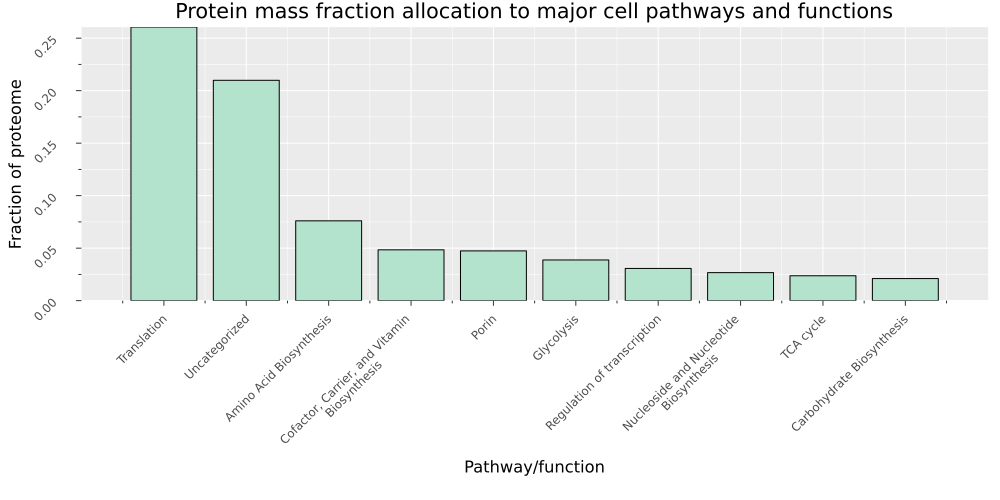

In [63]:
plot(bar(pathway_names[top_L2_rank][1:10], mass_relative[top_L2_rank][1:10]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Protein mass fraction allocation to major cell pathways and functions", 
    xlabel="Pathway/function", ylabel="Fraction of proteome",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)


# savefig("figures/protein_mass_dist_class.svg")

# Compare with Fe

In [64]:
cur_elements = ["FE"]

element_idxs = [element in cur_elements for element in element_names]

C_E = C * P * E
c_e = vec(C_E[:, element_idxs])
nz_e_idxs = findall(c_e .> 0)

[c_e[nz_e_idxs] protein_names[nz_e_idxs]]

c_e_counts = counts[nz_e_idxs] .* c_e[nz_e_idxs] 

# other counts already took care of complex size, magnitude, etc. 
C_W = C * W * W2
C_W_normed = C_W ./ (sum(C_W, dims=2) .+ 0.0000001)

E_W_capped = C_W_normed[nz_e_idxs, :] .* c_e_counts

e_w = vec(sum(E_W_capped, dims=1))
e_w_relative = e_w ./ sum(e_w)

top_e_w_rank = sortperm(e_w, rev=true)

[pathway_names[top_e_w_rank] e_w[top_e_w_rank]][1:40, :]

40×2 Matrix{Any}:
 "Electron Transfer Chains"                                         …       1.16422e5
 "Uncategorized"                                                       102126.0
 "Cofactor, Carrier, and Vitamin\nBiosynthesis"                         78036.1
 "Amino Acid Biosynthesis"                                              38109.7
 "TCA cycle"                                                            34794.0
 "Regulation of transcription"                                      …   33478.0
 "Redox homeostasis"                                                    18712.0
 "Secondary Metabolite\nBiosynthesis"                                   11672.0
 "Fermentation"                                                          9809.0
 "Nucleoside and Nucleotide\nBiosynthesis"                               7926.0
 "DNA repair"                                                       …    3683.0
 "Hydrogen Production"                                                   2744.0
 "Translation"  

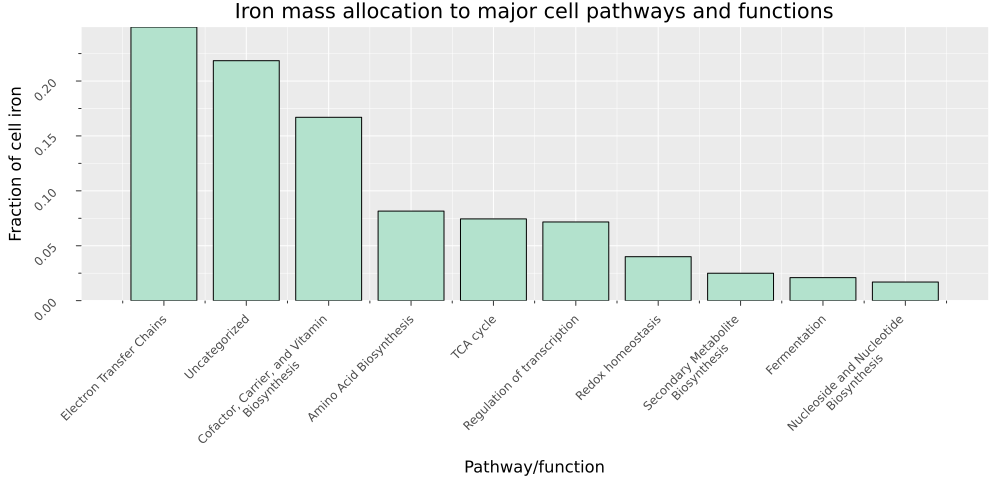

In [65]:
plot(bar(pathway_names[top_e_w_rank][1:10], e_w_relative[top_e_w_rank][1:10]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Iron mass allocation to major cell pathways and functions", 
    xlabel="Pathway/function", ylabel="Fraction of cell iron",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

# savefig("figures/iron_mass_dist_class.svg")

In [66]:
cur_elements = ["ZN"]

element_idxs = [element in cur_elements for element in element_names]

C_E = C * P * E
c_e = vec(C_E[:, element_idxs])
nz_e_idxs = findall(c_e .> 0)


c_e_counts = counts[nz_e_idxs] .* c_e[nz_e_idxs] 

# other counts already took care of complex size, magnitude, etc. 
C_W = C * W * W2
C_W_normed = C_W ./ (sum(C_W, dims=2) .+ 0.0000001)

E_W_capped = C_W_normed[nz_e_idxs, :] .* c_e_counts

e_w = vec(sum(E_W_capped, dims=1))
e_w_relative = e_w ./ sum(e_w)

top_e_w_rank = sortperm(e_w, rev=true)

[pathway_names[top_e_w_rank] e_w[top_e_w_rank]][1:40, :]

40×2 Matrix{Any}:
 "Translation"                                                       74791.0
 "Uncategorized"                                                     40186.7
 "Glycolysis"                                                        27490.8
 "Transcription"                                                     23486.0
 "Aminoacyl-tRNA Charging"                                           23185.0
 "Nucleoside and Nucleotide\nBiosynthesis"                           22670.0
 "Cofactor, Carrier, and Vitamin\nBiosynthesis"                      20721.3
 "Regulation of transcription"                                       20124.5
 "Carbohydrate Biosynthesis"                                         19707.7
 "Alcohol Degradation"                                               15022.0
 "Polymeric Compound Degradation"                                    12485.0
 "Amino Acid Biosynthesis"                                           11476.7
 "Proteolysis"                                            

In [67]:
plot(bar(pathway_names[top_e_w_rank][1:10], e_w_relative[top_e_w_rank][1:10]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Zinc mass allocation to major cell pathways and functions", 
    xlabel="Pathway/function", ylabel="Fraction of cell zinc",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

savefig("figures/zinc_mass_dist_class.svg")

"/Users/cyrus/vivarium-ecoli/notebooks/cofactors/figures/zinc_mass_dist_class.svg"

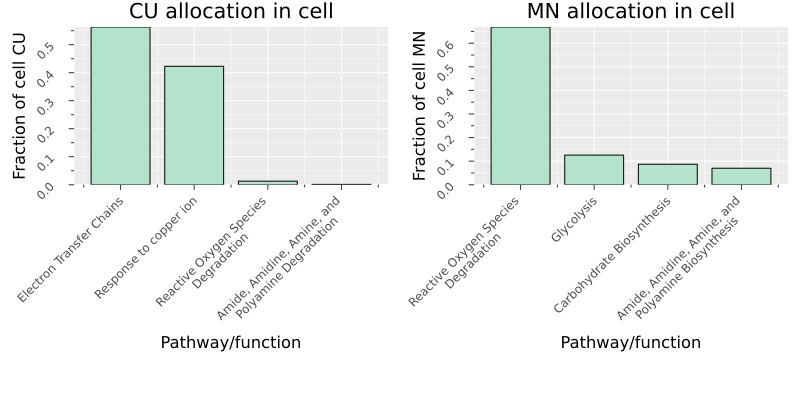

In [68]:
minor_elements = ["CU", "MN"]
plot_array = []

for element in minor_elements
    cur_elements = [element]
    
    element_idxs = [element in cur_elements for element in element_names]
    
    C_E = C * P * E
    c_e = vec(C_E[:, element_idxs])
    nz_e_idxs = findall(c_e .> 0)
    
    
    c_e_counts = counts[nz_e_idxs] .* c_e[nz_e_idxs] 
    
    # other counts already took care of complex size, magnitude, etc. 
    C_W = C * W * W2
    C_W_normed = C_W ./ (sum(C_W, dims=2) .+ 0.0000001)
    
    E_W_capped = C_W_normed[nz_e_idxs, :] .* c_e_counts
    
    e_w = vec(sum(E_W_capped, dims=1))
    e_w_relative = e_w ./ sum(e_w)
    
    top_e_w_rank = sortperm(e_w, rev=true)
    
    [pathway_names[top_e_w_rank] e_w[top_e_w_rank]][1:40, :]
    
    
    p = plot(bar(pathway_names[top_e_w_rank][1:4], e_w_relative[top_e_w_rank][1:4]), 
        legend = false, size=[800,400],
        rotation=45, 
        title="$element allocation in cell", 
        xlabel="Pathway/function", ylabel="Fraction of cell $element",
        bottom_margin=30Plots.mm, left_margin=5Plots.mm)

    push!(plot_array, p)

end

plot(plot_array..., layout=(1, 2))

# savefig("figures/cu_mn_dist_class.svg")

# metal ion per mass ratio

In [69]:
cur_elements = ["FE", "ZN", "MN", "CA", "NI", "CU", "MO", "SE", "CO"]

element_idxs = [element in cur_elements for element in element_names]

# first, get mass per top 20 class
# normalized class belonging
W_comb = W * W2
W_norm = Array{Float64}(copy(W_comb))

for i in 1:size(W_norm)[1]
    W_norm[i, :] = W_norm[i, :] / (sum(W_norm[i, :]) + 0.00001)
end

# first, for cplxes without cofactor 
mass_per_class = (transpose(W_norm) * transpose(Diagonal(monomer_masses)) * transpose(C) * vec(counts))
mass_per_class = Array{Float64}(mass_per_class)
mass_per_class = mass_per_class ./ (10^(10)) 
mass_per_class = mass_per_class ./ (6.023 * 10^(13)) 

top_mass_class = sortperm(mass_per_class, rev=true)
top_mass_filter = top_mass_class[1:15]

# now, get counts of transition metal ions per class
c_e_summed = vec(sum((C * P * E)[:, element_idxs], dims=2))
nz_e_idxs = findall(c_e_summed .> 0)

c_e_counts = counts[nz_e_idxs] .* c_e_summed[nz_e_idxs] 

# other counts already took care of complex size, magnitude, etc. 
C_W = C * W * W2
C_W_normed = C_W ./ (sum(C_W, dims=2) .+ 0.0000001)

E_W_capped = C_W_normed[nz_e_idxs, :] .* c_e_counts

e_w = vec(sum(E_W_capped, dims=1))

top_e_w_rank = sortperm(e_w, rev=true)

metal_atoms_per_protein_mass = e_w ./ (mass_per_class .* 10^15)
remove_nan = findall(isnan.(metal_atoms_per_protein_mass)) 
top_ratios = sortperm(metal_atoms_per_protein_mass, rev=true) 

filtered_top_ratios = [item for item in top_ratios if item ∉ remove_nan]
filtered_top_ratios = [item for item in filtered_top_ratios if item ∈ top_mass_filter]

[pathway_names[filtered_top_ratios] metal_atoms_per_protein_mass[filtered_top_ratios]][1:10, :]

10×2 Matrix{Any}:
 "Cofactor, Carrier, and Vitamin\nBiosynthesis"  7422.56
 "Regulation of transcription"                   4481.01
 "TCA cycle"                                     3568.59
 "Nucleoside and Nucleotide\nBiosynthesis"       3086.55
 "Carbohydrate Biosynthesis"                     3027.99
 "Aminoacyl-tRNA Charging"                       2566.21
 "Transcription"                                 2461.83
 "Glycolysis"                                    2262.1
 "Amino Acid Biosynthesis"                       2185.71
 "Uncategorized"                                 1601.68

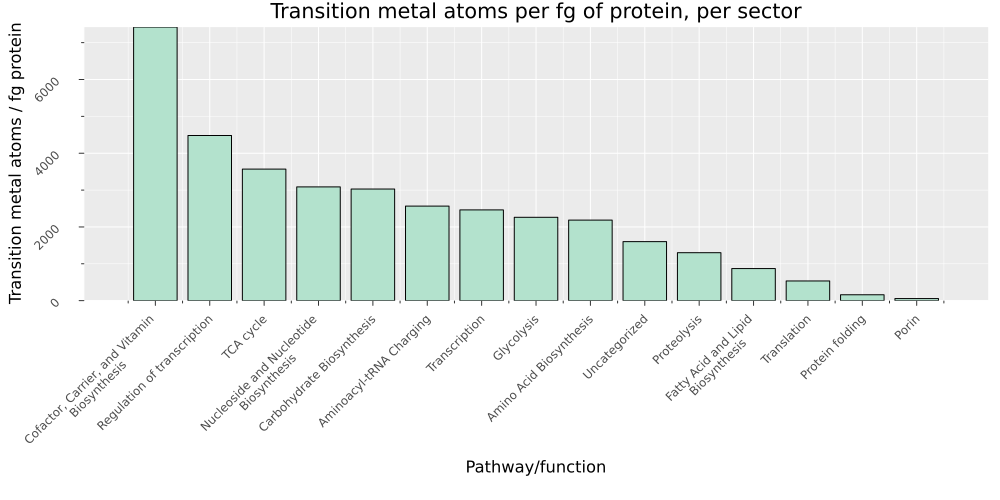

In [70]:
plot(bar(pathway_names[filtered_top_ratios][1:15], metal_atoms_per_protein_mass[filtered_top_ratios][1:15]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Transition metal atoms per fg of protein, per sector", 
    xlabel="Pathway/function", ylabel="Transition metal atoms / fg protein",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

# savefig("figures/atoms_per_fg_per_sector.svg")

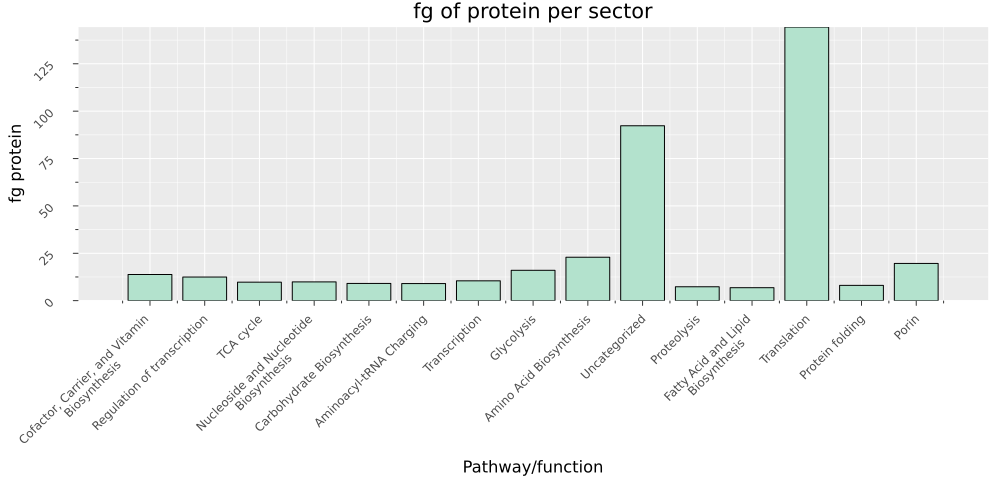

In [71]:
plot(bar(pathway_names[filtered_top_ratios][1:15], (mass_per_class .* 10^15)[filtered_top_ratios][1:15]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="fg of protein per sector", 
    xlabel="Pathway/function", ylabel="fg protein",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

# savefig("figures/protein_per_sector.svg")

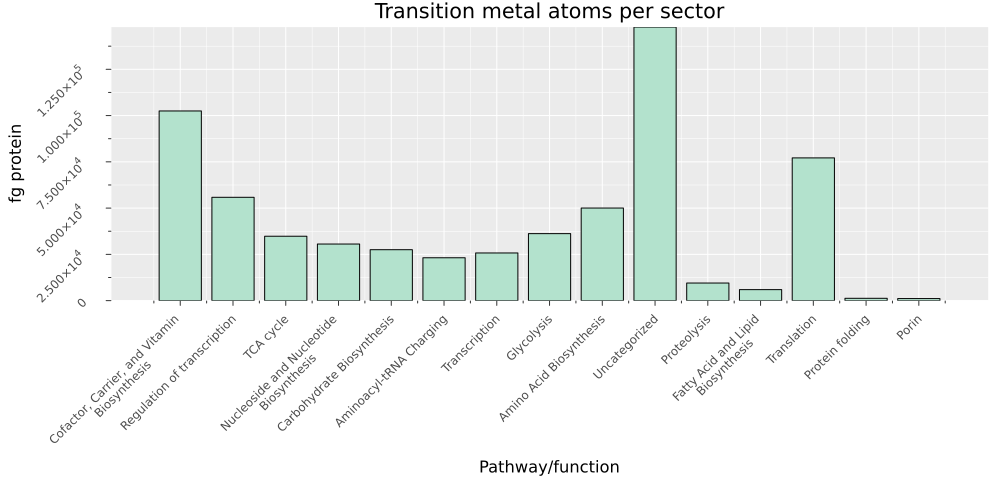

In [72]:
plot(bar(pathway_names[filtered_top_ratios][1:15], e_w[filtered_top_ratios][1:15]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Transition metal atoms per sector", 
    xlabel="Pathway/function", ylabel="fg protein",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

# savefig("figcolorsures/atoms_per_sector.svg")

# Areas and distribution across sectors

In [73]:
total_areas = (counts_min .* protein_areas) / sum( (counts_min .* protein_areas) )
area_order = sortperm(total_areas, rev=true)

[protein_names[area_order[1:20]] total_areas[area_order[1:20]] counts_min[area_order[1:20]] protein_areas[area_order[1:20]]] 

20×4 Matrix{Any}:
 "cytochrome\n<i>bo<sub>3</sub></i>\nubiquinol:oxygen\noxidoreductase"  …  0.179996   6775   84.1249
 "multidrug efflux pump\naccessory protein AcrZ"                           0.0597384  2418   78.2291
 "30S ribosomal subunit\nbiogenesis factor LepA"                           0.0254909   987   81.7785
 "\n&alpha;-ketoglutarate:H<sup>+</sup>\nsymporter"                        0.0229106  4168   17.4052
 "NADH:quinone oxidoreductase I"                                           0.0225476   666  107.201
 "putative signal transduction\nprotein (SH3 domain)"                   …  0.019549   1222   50.6552
 "mannose-specific PTS enzyme\nIIAB component"                             0.0194774   716   86.1367
 "chemotaxis protein CheW"                                                 0.018631   5724   10.3064
 "chemotaxis protein\nmethyltransferase"                                   0.0182144  2143   26.9131
 "glucose-specific PTS enzyme II"                                         

# Fraction of active protein complexes with at least one cofactor 